In [ ]:
import numpy as np
from EuCAP2024.umbms.tdelay import propspeed
import pickle
from EuCAP2024.umbms.recon import extras
from EuCAP2024.umbms.tdelay import propspeed
from EuCAP2024.umbms.hardware import antenna as an
from EuCAP2024.umbms.recon import algos
from EuCAP2024.umbms.plot.imgs import plot_img

In [ ]:

# 90/7: ('phant_id'): 'A11F1', np.str_('tum_rad'): 1.5, np.str_('tum_shape'): 'sphere', np.str_('tum_x'): 2.25, np.str_('tum_y'): -2.25, ('ant_rad'): 22.0
# 46/24: 'phant_id'): 'A16F13', np.str_('tum_rad'): 1.0, np.str_('tum_shape'): 'sphere', np.str_('tum_x'): -0.75, np.str_('tum_y'): -0.75, ('ant_rad'): 23.0
# 494/41: 'phant_id'): 'A3F3', np.str_('tum_rad'): 1.5, np.str_('tum_shape'): 'sphere', np.str_('tum_x'): -2.25, np.str_('tum_y'): -1.0, ('ant_rad'): 22.0


In [14]:
roi_radius = 8
m_size = int(roi_radius * 2/0.1)
adi_rad = 5.66
antenna_r = 22 + 2.4
frequencies_1001 = np.linspace(1e9, 8e9,1001)
frequencies_288 = frequencies_1001[137::3]

speed = propspeed.estimate_speed(adi_rad, antenna_r)
pix_ts = extras.get_pix_ts(antenna_r, m_size, roi_radius, speed, 72, -136)
a_td = an.apply_ant_t_delay(pix_ts)
pf = extras.get_fd_phase_factor(a_td)

In [ ]:
def load(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)
dataset_wos_original = load("fd_data_s11_adi.pickle")

wos_original_41 = dataset_wos_original[494]#41
wos_original_41_reducedfq = wos_original_41[137::3,:]

wos_predicted_41 = np.load("sample_41.npy") #these have to be generated from the skin-substraction ML code
wos_predicted_41 = wos_predicted_41[:,:,0]

In [ ]:
das_original_41 = algos.fd_das(np.abs(wos_original_41), pf, frequencies_1001)
print('--')
das_original_41_reducedfq = algos.fd_das(np.abs(wos_original_41_reducedfq), pf, frequencies_288)
print('--')
das_predicted_41 = algos.fd_das(np.abs(wos_predicted_41), pf, frequencies_288)

--
--


Original_1001


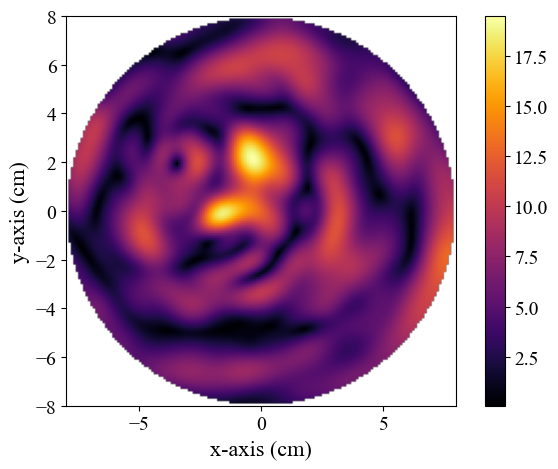

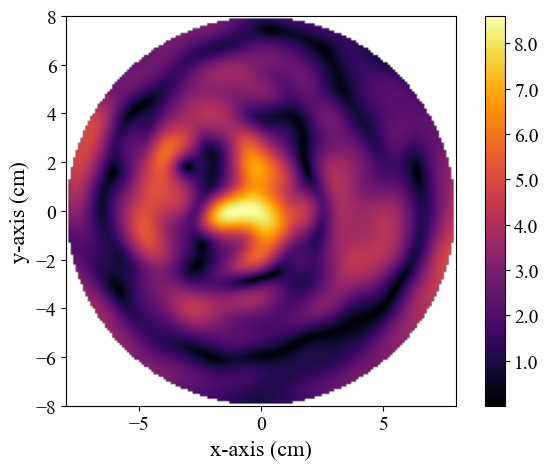

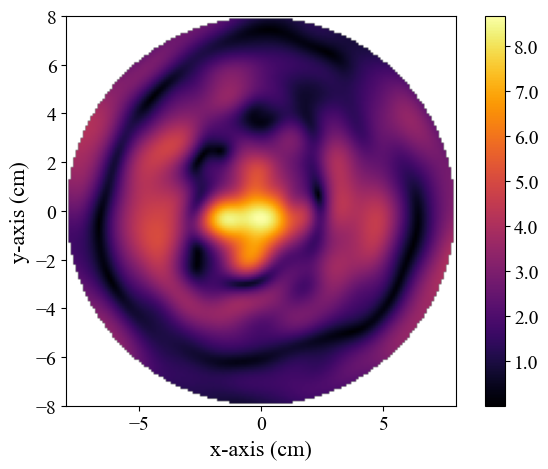

In [ ]:
print('Original_1001')
plot_img(img=np.abs(das_original_41), roi_rho=roi_radius)#, save_fig=True, save_str=os.path.join(r'C:\Users\Gabriela\Desktop', "wv"))
# print('Original_288')
plot_img(img=np.abs(das_original_41_reducedfq), roi_rho=roi_radius)
# print('Predicted_288')
plot_img(img=np.abs(das_predicted_41), roi_rho=roi_radius)